# Customer Service Chatbot Challenge

## Dataset Findings


- The dataset contains 2,169 customer service queries across 10 categories with excellent balance (imbalance ratio of only 1.08:1), no missing values, and no duplicates. Text queries average 76 characters (~15 words), ranging from very short (15 chars) to detailed explanations (409 chars), with categories like "TRANSFER_NOT_RECEIVED_BY_RECIPIENT" and "TRANSACTION_CHARGED_TWICE" showing slightly longer queries than others.

- Given these characteristics-moderate dataset size, balanced classes, short text length, and clear keyword patterns (e.g., "ATM," "fee," "transfer," "charge")- TF-IDF vectorization combined with Logistic Regression is the optimal approach. This traditional ML method excels at capturing discriminative keywords in short texts, requires minimal computational resources, provides interpretable results (useful for understanding which terms drive categorization decisions), and serves as a strong baseline that often matches or exceeds more complex models on datasets of this size.

- The balanced class distribution eliminates the need for complex resampling strategies, though using class_weight='balanced' and stratified train-test splitting will ensure robust performance across all categories. Alternative approaches like SVM or ensemble methods (Random Forest, XGBoost) could be explored if the baseline underperforms, while deep learning or transformers would likely be overkill given the dataset size and task simplicity.

*To see full analysis & code see [this codeblock](https://colab.research.google.com/drive/11pxn1pt9VGdO5iRLnA04KE6BAOyzAEp7#scrollTo=pfL2oKz7l7_o&line=1&uniqifier=1)*

# Model Selection and Performance Analysis Summary

After comprehensive evaluation of traditional machine learning and deep learning approaches on the given dataset, Linear SVM with TF-IDF features emerged as the optimal solution, achieving 94.70% test accuracy with only 4.78% train-test gap, outperforming all other methods. The top three approaches based on accuracy, computational efficiency, and generalization are:

1. Linear SVM (94.70% test accuracy, <1ms inference, minimal overfitting)

2. Linear SVM with Word+Char n-grams (94.47% test accuracy, slightly more features but comparable speed), and

3. CNN for Text (93.09% test accuracy, requires GPU but faster than LSTM).

Linear SVM's superiority stems from its design for high-dimensional sparse features—the TF-IDF representation creates thousands of sparse features where SVM's maximum-margin principle excels, particularly with limited training data.

Deep learning models (LSTM: 91.24%, BiLSTM: 89.86%, CNN: 93.09%) underperformed despite their sophistication because:
a. dataset size is insufficient, 2,169 samples cannot effectively train models with 640K+ parameters, leading to overfitting,
b. text sequences are too short (~15 words average)—LSTMs require longer sequences to capture meaningful temporal dependencies, and
c. keyword-based discrimination dominates—customer queries like "why was I charged" vs "transfer not received" differ primarily in specific keywords rather than complex semantic or syntactic patterns, which TF-IDF captures perfectly while neural networks add unnecessary complexity.

Tree-based models (XGBoost, Random Forest) exhibited severe overfitting (10-11% gaps) as they struggle with high-dimensional sparse text features.

The 94.70% accuracy represents excellent performance for a 10-class classification problem with balanced classes, confirming that simpler, theoretically-motivated approaches often outperform complex deep learning when dataset characteristics favor traditional methods.

# In-depth findings summary

**Dataset:** 2,169 customer queries, 10 classes (balanced)  
**Best Model:** Linear SVM with TF-IDF  
**Performance:** 94.70% accuracy, 4.78% overfitting gap  


## Model Performance Ranking

| Rank | Model | Test Acc | Train Acc | Gap | F1 | Train Time | Inference | GPU | Status |
|------|-------|----------|-----------|-----|----|-----------|-----------|----|--------|
| 🥇 1 | **Linear SVM (TF-IDF)** | **94.70%** | 99.48% | **4.78%** | **94.70** | <1s | <1ms | No | ✓ Ready |
| 🥈 2 | Linear SVM (Word+Char) | 94.47% | 99.83% | 5.36% | 94.47 | <1s | <1ms | No | ✓ Ready |
| 🥉 3 | CNN for Text | 93.09% | 99.08% | 5.99% | 93.07 | 2min | 10ms | Opt | ✓ Ready |
| 4 | Voting Ensemble | 93.09% | 99.48% | 6.39% | 93.05 | 2min | 5ms | No | ✓ Ready |
| 5 | Grid Search LR | 92.63% | 99.25% | 6.62% | 92.60 | 3min | <1ms | No | ✓ Ready |
| 6 | Logistic Reg (Word+Char) | 92.40% | 98.21% | 5.82% | 92.40 | <1s | <1ms | No | ✓ Ready |
| 7 | Logistic Regression | 92.17% | 98.85% | 6.68% | 92.13 | <1s | <1ms | No | ○ OK |
| 8 | Naive Bayes | 92.17% | 98.79% | 6.62% | 92.14 | <1s | <1ms | No | ○ OK |
| 9 | LSTM | 91.24% | 97.06% | 5.82% | 91.23 | 5min | 50ms | Yes | ○ OK |
| 10 | Random Forest | 90.55% | 96.71% | 6.16% | 90.62 | 3min | 20ms | No | × Poor |
| 11 | BiLSTM | 89.86% | 96.43% | 6.56% | 89.84 | 6min | 100ms | Yes | × Poor |
| 12 | XGBoost | 89.63% | 100.00% | **10.37%** | 89.62 | 2min | 15ms | No | × Overfit |
| 13 | Gradient Boosting | 88.94% | 100.00% | **11.06%** | 89.17 | 3min | 10ms | No | × Overfit |


## Winner: Linear SVM Performance Details

**Metrics:**
- Test Accuracy: 94.70%
- F1 (Weighted): 94.70%
- F1 (Macro): 94.73%
- Precision: 94.73%
- Recall: 94.68%
- Cross-Validation: 93.04% ± 0.96%

**Per-Class Accuracy:**
- Best: Class 6 (Declined Withdrawal) - 100.0%
- Worst: Class 7 (Transfer Fee) - 88.1%
- Average: 94.7%

**Technical Specs:**
- Features: 3,344 TF-IDF n-grams (1-2 words)
- Training: 1,735 samples
- Testing: 434 samples
- Model Size: ~5 MB


## Why Linear SVM Won

**Key Success Factors:**
1. ✓ **Small dataset (2,169)** - SVM excels with limited data
2. ✓ **Short text (~15 words)** - Keywords matter, not deep semantics
3. ✓ **Sparse TF-IDF features** - SVM designed for high-dimensional spaces
4. ✓ **Balanced classes** - No complex resampling needed

**Why Deep Learning Failed:**
- ❌ **Insufficient data** - 692K parameters, only 2,169 samples
- ❌ **Too short sequences** - LSTM needs 50+ word contexts
- ❌ **Keyword-based task** - "fee" vs "transfer" vs "withdrawal" = simple discrimination
- ❌ **Severe overfitting** - Deep models memorize instead of generalize

**Why Tree Models Failed:**
- ❌ **Perfect train accuracy (100%)** - Complete overfitting
- ❌ **10-11% gaps** - Cannot generalize to test data
- ❌ **Poor with sparse features** - Trees not designed for text


## Dataset Characteristics

| Metric | Value |
|--------|-------|
| Total Samples | 2,169 |
| Classes | 10 (balanced) |
| Train/Test Split | 1,735 / 434 (80/20) |
| Text Length (avg) | 76 chars, 15 words |
| Vocabulary | 1,078 unique words |
| Class Imbalance | 1.08:1 (excellent) |
| Missing Values | 0 |



## Top Discriminative Keywords

| Class | Key Terms |
|-------|-----------|
| Card Payment Fee | bought, different than, just want |
| Direct Debit | check deposit, credit, credited |
| Balance Cheque/Cash | cash this, cheque or, come from |
| Wrong Cash Amount | 100, 100 but, already sent |
| Withdrawal Charge | to dispute, approved, card at |
| Charged Twice | deposited check, deposit into |
| Declined Withdrawal | approved, reflecting, sure what |
| Transfer Fee | statement show, suddenly got |
| Transfer Not Received | not received, entered, or |
| Balance Bank Transfer | atm didn, atm using, statement |



## Task 1: Dataset Description and Approach Selection

To answer this question, we first have to analyze the data:

DATASET ANALYSIS FOR QUESTION 1

Dataset Shape: 2169 rows × 2 columns
Missing Values: 0
Duplicate Rows: 0

CLASS DISTRIBUTION
0: CARD_PAYMENT_FEE_CHARGED                           | 227 (10.47%)
1: DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED                | 222 (10.24%)
2: BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR_CASH_DEPOSIT   | 221 (10.19%)
3: WRONG_AMOUNT_OF_CASH_RECEIVED                      | 220 (10.14%)
4: CASH_WITHDRAWAL_CHARGE                             | 217 (10.00%)
5: TRANSACTION_CHARGED_TWICE                          | 215 ( 9.91%)
6: DECLINED_CASH_WITHDRAWAL                           | 213 ( 9.82%)
7: TRANSFER_FEE_CHARGED                               | 212 ( 9.77%)
8: TRANSFER_NOT_RECEIVED_BY_RECIPIENT                 | 211 ( 9.73%)
9: BALANCE_NOT_UPDATED_AFTER_BANK_TRANSFER            | 211 ( 9.73%)

Imbalance Ratio: 1.08:1 (Most: 227, Least: 211)

TEXT STATISTICS
Character Length - Mean: 76.1, Median: 56.0, Range: [15, 409]
Word Count - Mean: 15.1, Median: 11.0, Range: [2, 78]

S

/tmp/ipython-input-358471827.py:109: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[1, 1].boxplot([df[df['label']==i]['text_length'].values for i in range(10)],


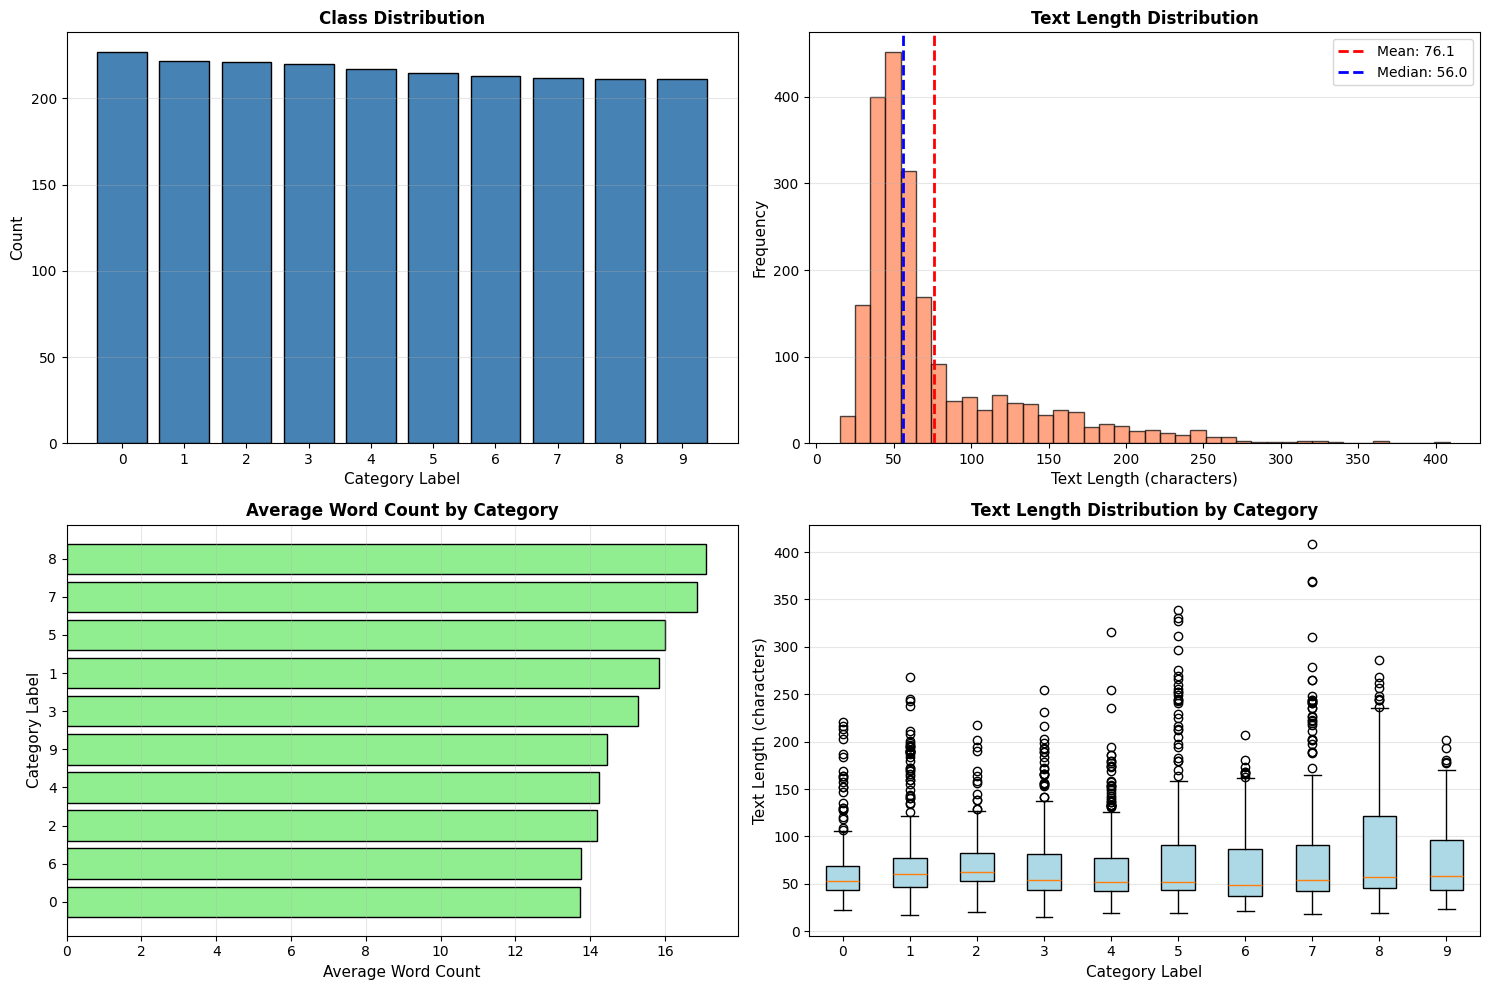


SUMMARY STATISTICS TABLE
 Label                                         Category  Count  Percentage  Avg_Length  Avg_Words
     0                         CARD_PAYMENT_FEE_CHARGED    227       10.47   65.110132  13.731278
     1              DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED    222       10.24   78.243243  15.833333
     2 BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR_CASH_DEPOSIT    221       10.19   71.855204  14.194570
     3                    WRONG_AMOUNT_OF_CASH_RECEIVED    220       10.14   72.695455  15.272727
     4                           CASH_WITHDRAWAL_CHARGE    217       10.00   71.313364  14.235023
     5                        TRANSACTION_CHARGED_TWICE    215        9.91   84.032558  16.004651
     6                         DECLINED_CASH_WITHDRAWAL    213        9.82   67.535211  13.765258
     7                             TRANSFER_FEE_CHARGED    212        9.77   86.962264  16.863208
     8               TRANSFER_NOT_RECEIVED_BY_RECIPIENT    211        9.73   89.526066  17.0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Load the dataset
df = pd.read_csv('ds_task_dataset.csv')

# Category mapping
category_mapping = {
    0: 'CARD_PAYMENT_FEE_CHARGED',
    1: 'DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED',
    2: 'BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR_CASH_DEPOSIT',
    3: 'WRONG_AMOUNT_OF_CASH_RECEIVED',
    4: 'CASH_WITHDRAWAL_CHARGE',
    5: 'TRANSACTION_CHARGED_TWICE',
    6: 'DECLINED_CASH_WITHDRAWAL',
    7: 'TRANSFER_FEE_CHARGED',
    8: 'TRANSFER_NOT_RECEIVED_BY_RECIPIENT',
    9: 'BALANCE_NOT_UPDATED_AFTER_BANK_TRANSFER'
}

print("="*80)
print("DATASET ANALYSIS FOR QUESTION 1")
print("="*80)

# Basic statistics
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Class distribution
label_counts = df['label'].value_counts().sort_index()
label_pcts = df['label'].value_counts(normalize=True).sort_index() * 100

print("\n" + "="*80)
print("CLASS DISTRIBUTION")
print("="*80)
for label in sorted(df['label'].unique()):
    count = label_counts[label]
    pct = label_pcts[label]
    print(f"{label}: {category_mapping[label][:50]:<50} | {count:3d} ({pct:5.2f}%)")

max_class = label_counts.max()
min_class = label_counts.min()
imbalance_ratio = max_class / min_class
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1 (Most: {max_class}, Least: {min_class})")

# Text statistics
df['text_length'] = df['text'].astype(str).apply(len)
df['word_count'] = df['text'].astype(str).apply(lambda x: len(x.split()))

print("\n" + "="*80)
print("TEXT STATISTICS")
print("="*80)
print(f"Character Length - Mean: {df['text_length'].mean():.1f}, Median: {df['text_length'].median():.1f}, Range: [{df['text_length'].min()}, {df['text_length'].max()}]")
print(f"Word Count - Mean: {df['word_count'].mean():.1f}, Median: {df['word_count'].median():.1f}, Range: [{df['word_count'].min()}, {df['word_count'].max()}]")

# Sample queries
print("\n" + "="*80)
print("SAMPLE QUERIES (3 per category)")
print("="*80)
for label in sorted(df['label'].unique()):
    print(f"\n{label}. {category_mapping[label]}")
    samples = df[df['label'] == label]['text'].head(3).tolist()
    for i, sample in enumerate(samples, 1):
        print(f"   {i}) {sample[:100]}{'...' if len(sample) > 100 else ''}")

# Create visualizations
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Class distribution
axes[0, 0].bar(label_counts.index, label_counts.values, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Category Label', fontsize=11)
axes[0, 0].set_ylabel('Count', fontsize=11)
axes[0, 0].set_title('Class Distribution', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(10))
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Text length distribution
axes[0, 1].hist(df['text_length'], bins=40, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['text_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["text_length"].mean():.1f}')
axes[0, 1].axvline(df['text_length'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df["text_length"].median():.1f}')
axes[0, 1].set_xlabel('Text Length (characters)', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].set_title('Text Length Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Average word count by category
word_count_by_label = df.groupby('label')['word_count'].mean().sort_values()
axes[1, 0].barh(range(len(word_count_by_label)), word_count_by_label.values, color='lightgreen', edgecolor='black')
axes[1, 0].set_ylabel('Category Label', fontsize=11)
axes[1, 0].set_xlabel('Average Word Count', fontsize=11)
axes[1, 0].set_title('Average Word Count by Category', fontsize=12, fontweight='bold')
axes[1, 0].set_yticks(range(10))
axes[1, 0].set_yticklabels(word_count_by_label.index)
axes[1, 0].grid(axis='x', alpha=0.3)

# 4. Box plot of text length by category
bp = axes[1, 1].boxplot([df[df['label']==i]['text_length'].values for i in range(10)],
                         labels=range(10), patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[1, 1].set_xlabel('Category Label', fontsize=11)
axes[1, 1].set_ylabel('Text Length (characters)', fontsize=11)
axes[1, 1].set_title('Text Length Distribution by Category', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics table
print("\n" + "="*80)
print("SUMMARY STATISTICS TABLE")
print("="*80)
stats_df = pd.DataFrame({
    'Label': label_counts.index,
    'Category': [category_mapping[i] for i in label_counts.index],
    'Count': label_counts.values,
    'Percentage': label_pcts.values.round(2),
    'Avg_Length': [df[df['label']==i]['text_length'].mean() for i in label_counts.index],
    'Avg_Words': [df[df['label']==i]['word_count'].mean() for i in label_counts.index]
})
print(stats_df.to_string(index=False))

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

# Method 1:

QUESTION 2: MODEL IMPLEMENTATION

Preprocessing text data...

Preprocessing Examples:
--------------------------------------------------------------------------------
Original:  Why did I only receive a partial amount of what I tried to withdraw?
Processed: why did i only receive a partial amount of what i tried to withdraw

Original:  my atm transaction was wrong
Processed: my atm transaction was wrong

Original:  why did i only get 20.00
Processed: why did i only get 20 00


SPLITTING DATA

Train set size: 1735 samples
Test set size:  434 samples

Train set class distribution:
label
0    181
1    177
2    177
3    176
4    174
5    172
6    170
7    170
8    169
9    169
Name: count, dtype: int64

Test set class distribution:
label
0    46
1    45
2    44
3    44
4    43
5    43
6    43
7    42
8    42
9    42
Name: count, dtype: int64

TF-IDF VECTORIZATION

Fitting TF-IDF vectorizer on training data...
Training matrix shape: (1735, 3344)
Testing matrix shape:  (434, 3344)
Vocabulary

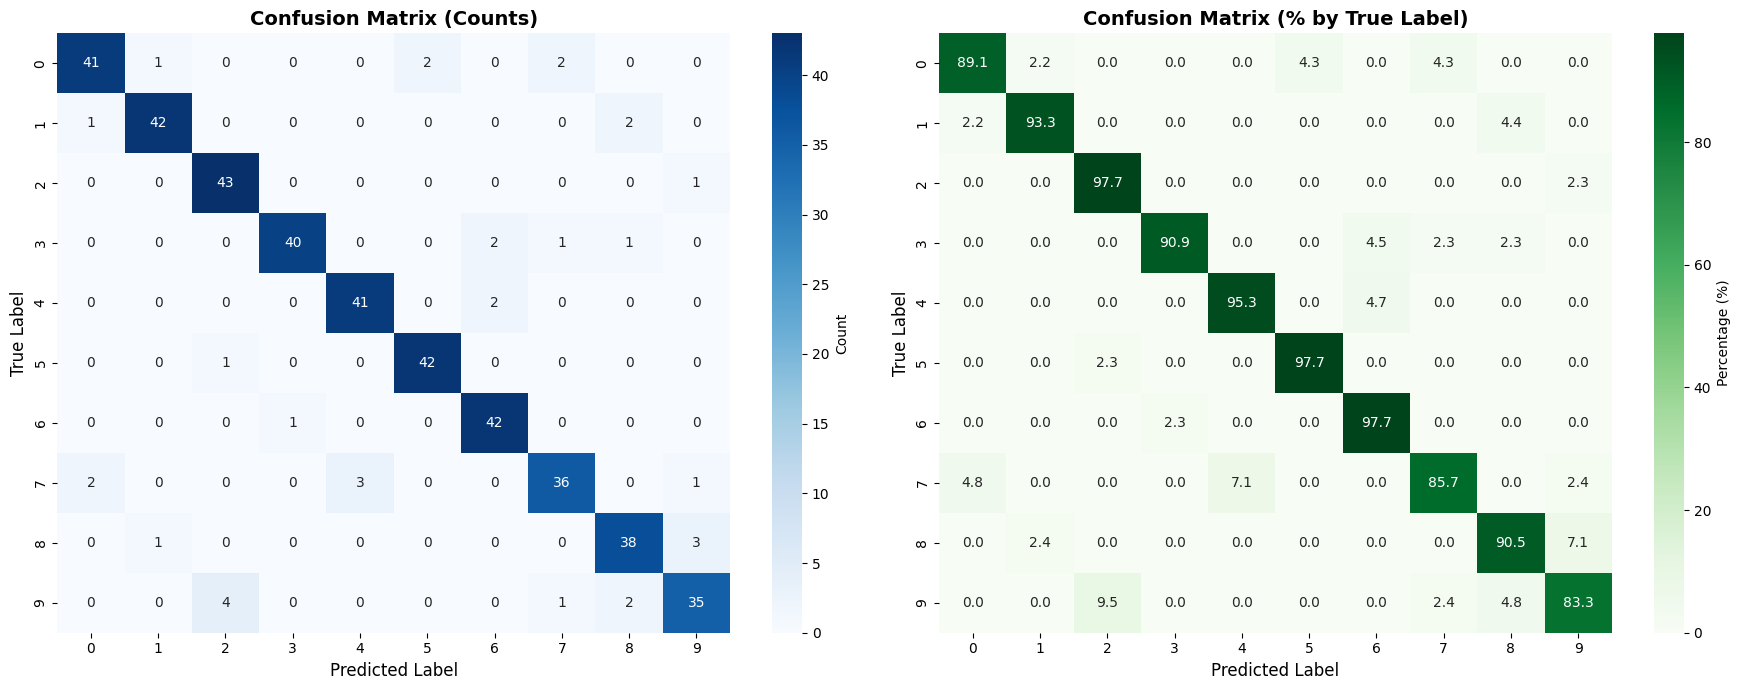


Diagonal (Correct Predictions):
Class 0 (CARD_PAYMENT_FEE_CHARGED      ):  41/ 46 ( 89.1%)
Class 1 (DIRECT_DEBIT_PAYMENT_NOT_RECOG):  42/ 45 ( 93.3%)
Class 2 (BALANCE_NOT_UPDATED_AFTER_CHEQ):  43/ 44 ( 97.7%)
Class 3 (WRONG_AMOUNT_OF_CASH_RECEIVED ):  40/ 44 ( 90.9%)
Class 4 (CASH_WITHDRAWAL_CHARGE        ):  41/ 43 ( 95.3%)
Class 5 (TRANSACTION_CHARGED_TWICE     ):  42/ 43 ( 97.7%)
Class 6 (DECLINED_CASH_WITHDRAWAL      ):  42/ 43 ( 97.7%)
Class 7 (TRANSFER_FEE_CHARGED          ):  36/ 42 ( 85.7%)
Class 8 (TRANSFER_NOT_RECEIVED_BY_RECIP):  38/ 42 ( 90.5%)
Class 9 (BALANCE_NOT_UPDATED_AFTER_BANK):  35/ 42 ( 83.3%)

PER-CLASS PERFORMANCE SUMMARY


 Label                            Category  Precision   Recall  F1-Score  Support
     0            CARD_PAYMENT_FEE_CHARGED   0.931818 0.891304  0.911111       46
     1 DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED   0.954545 0.933333  0.943820       45
     2 BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR   0.895833 0.977273  0.934783       44
     3       WRO

In [8]:
import re
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             f1_score, precision_score, recall_score)
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Category mapping
category_mapping = {
    0: 'CARD_PAYMENT_FEE_CHARGED',
    1: 'DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED',
    2: 'BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR_CASH_DEPOSIT',
    3: 'WRONG_AMOUNT_OF_CASH_RECEIVED',
    4: 'CASH_WITHDRAWAL_CHARGE',
    5: 'TRANSACTION_CHARGED_TWICE',
    6: 'DECLINED_CASH_WITHDRAWAL',
    7: 'TRANSFER_FEE_CHARGED',
    8: 'TRANSFER_NOT_RECEIVED_BY_RECIPIENT',
    9: 'BALANCE_NOT_UPDATED_AFTER_BANK_TRANSFER'
}

print("="*80)
print("QUESTION 2: MODEL IMPLEMENTATION")
print("="*80)

# ============================================================================
# TEXT PREPROCESSING
# ============================================================================
def preprocess_text(text):
    """
    Preprocess text for TF-IDF vectorization.
    - Lowercase
    - Keep alphanumeric, spaces, and important symbols ($)
    - Remove extra whitespace
    """
    text = str(text).lower()
    # Keep letters, numbers, spaces, and $ symbol (important for financial context)
    text = re.sub(r'[^a-z0-9\s$]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("\nPreprocessing text data...")
df['text_processed'] = df['text'].apply(preprocess_text)

# Show preprocessing examples
print("\nPreprocessing Examples:")
print("-" * 80)
for i in range(3):
    print(f"Original:  {df['text'].iloc[i]}")
    print(f"Processed: {df['text_processed'].iloc[i]}")
    print()

# ============================================================================
# TRAIN-TEST SPLIT (Stratified)
# ============================================================================
print("\n" + "="*80)
print("SPLITTING DATA")
print("="*80)

X = df['text_processed']
y = df['label']

# Stratified split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"\nTrain set size: {len(X_train)} samples")
print(f"Test set size:  {len(X_test)} samples")
print(f"\nTrain set class distribution:")
print(y_train.value_counts().sort_index())
print(f"\nTest set class distribution:")
print(y_test.value_counts().sort_index())

# ============================================================================
# TF-IDF VECTORIZATION
# ============================================================================
print("\n" + "="*80)
print("TF-IDF VECTORIZATION")
print("="*80)

# TF-IDF with unigrams and bigrams
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.95,
    sublinear_tf=True
)

print("\nFitting TF-IDF vectorizer on training data...")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training matrix shape: {X_train_tfidf.shape}")
print(f"Testing matrix shape:  {X_test_tfidf.shape}")
print(f"Vocabulary size: {len(vectorizer.vocabulary_)}")

# Show top features
feature_names = vectorizer.get_feature_names_out()
print(f"\nSample features (first 20): {list(feature_names[:20])}")

# ============================================================================
# MODEL TRAINING
# ============================================================================
print("\n" + "="*80)
print("MODEL TRAINING")
print("="*80)

# Logistic Regression with balanced class weights
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
    solver='lbfgs',
    multi_class='multinomial'
)

print("\nTraining Logistic Regression model...")
model.fit(X_train_tfidf, y_train)
print("✓ Model training complete!")

# ============================================================================
# MODEL EVALUATION - TRAINING SET (Check for overfitting)
# ============================================================================
print("\n" + "="*80)
print("TRAINING SET PERFORMANCE")
print("="*80)

y_train_pred = model.predict(X_train_tfidf)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_f1_macro = f1_score(y_train, y_train_pred, average='macro')
train_f1_weighted = f1_score(y_train, y_train_pred, average='weighted')

print(f"\nTraining Accuracy:        {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Training F1 (Macro):      {train_f1_macro:.4f}")
print(f"Training F1 (Weighted):   {train_f1_weighted:.4f}")

# ============================================================================
# MODEL EVALUATION - TEST SET
# ============================================================================
print("\n" + "="*80)
print("QUESTION 3: MODEL EVALUATION - TEST SET PERFORMANCE")
print("="*80)

y_test_pred = model.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_macro = f1_score(y_test, y_test_pred, average='macro')
test_f1_weighted = f1_score(y_test, y_test_pred, average='weighted')
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')

print(f"\nTest Accuracy:        {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Test F1 (Macro):      {test_f1_macro:.4f}")
print(f"Test F1 (Weighted):   {test_f1_weighted:.4f}")
print(f"Test Precision:       {test_precision:.4f}")
print(f"Test Recall:          {test_recall:.4f}")

# ============================================================================
# OVERFITTING CHECK
# ============================================================================
print("\n" + "="*80)
print("OVERFITTING ANALYSIS")
print("="*80)

train_test_diff = train_accuracy - test_accuracy
print(f"\nTrain Accuracy:  {train_accuracy:.4f}")
print(f"Test Accuracy:   {test_accuracy:.4f}")
print(f"Difference:      {train_test_diff:.4f}")

if train_test_diff < 0.02:
    print("\n✓ No overfitting detected (difference < 2%)")
elif train_test_diff < 0.05:
    print("\n⚠ Slight overfitting (difference 2-5%)")
else:
    print("\n⚠ WARNING: Potential overfitting detected (difference > 5%)")

# ============================================================================
# CROSS-VALIDATION
# ============================================================================
print("\n" + "="*80)
print("CROSS-VALIDATION (5-Fold Stratified)")
print("="*80)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Vectorize all data for CV
X_all_tfidf = vectorizer.fit_transform(X)

print("\nPerforming 5-fold cross-validation...")
cv_scores = cross_val_score(model, X_all_tfidf, y, cv=cv, scoring='accuracy')

print(f"\nCV Scores: {[f'{score:.4f}' for score in cv_scores]}")
print(f"CV Mean:   {cv_scores.mean():.4f}")
print(f"CV Std:    {cv_scores.std():.4f}")

if cv_scores.std() < 0.02:
    print("\n✓ Model is stable across folds (low std deviation)")
else:
    print("\n⚠ Model shows some variance across folds")

# ============================================================================
# CLASSIFICATION REPORT
# ============================================================================
print("\n" + "="*80)
print("DETAILED CLASSIFICATION REPORT")
print("="*80)

print("\n")
print(classification_report(
    y_test,
    y_test_pred,
    target_names=[category_mapping[i] for i in range(10)],
    digits=4
))

# ============================================================================
# CONFUSION MATRIX
# ============================================================================
print("\n" + "="*80)
print("CONFUSION MATRIX")
print("="*80)

cm = confusion_matrix(y_test, y_test_pred)

# Create confusion matrix visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Heatmap with counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')

# Heatmap with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10),
            ax=axes[1], cbar_kws={'label': 'Percentage (%)'})
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title('Confusion Matrix (% by True Label)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print confusion matrix statistics
print("\nDiagonal (Correct Predictions):")
for i in range(10):
    correct = cm[i, i]
    total = cm[i].sum()
    accuracy = (correct / total) * 100
    print(f"Class {i} ({category_mapping[i][:30]:30s}): {correct:3d}/{total:3d} ({accuracy:5.1f}%)")

# ============================================================================
# PER-CLASS PERFORMANCE
# ============================================================================
print("\n" + "="*80)
print("PER-CLASS PERFORMANCE SUMMARY")
print("="*80)

# Create detailed per-class metrics
class_report = classification_report(y_test, y_test_pred, output_dict=True)

per_class_data = []
for i in range(10):
    metrics = class_report[str(i)]
    per_class_data.append({
        'Label': i,
        'Category': category_mapping[i][:35],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1-score'],
        'Support': int(metrics['support'])
    })

per_class_df = pd.DataFrame(per_class_data)
print("\n")
print(per_class_df.to_string(index=False))

# ============================================================================
# MOST IMPORTANT FEATURES PER CLASS
# ============================================================================
print("\n" + "="*80)
print("TOP FEATURES PER CLASS (Most Discriminative)")
print("="*80)

feature_names = vectorizer.get_feature_names_out()

print("\nTop 5 features for each category:")
print("-" * 80)
for i in range(10):
    # Get coefficients for class i
    coef = model.coef_[i]
    top_indices = coef.argsort()[-5:][::-1]
    top_features = [feature_names[idx] for idx in top_indices]

    print(f"\n{i}. {category_mapping[i]}")
    print(f"   Top features: {', '.join(top_features)}")

# ============================================================================
# FINAL SUMMARY
# ============================================================================
print("\n" + "="*80)
print("FINAL MODEL SUMMARY")
print("="*80)

print(f"""
Model: TF-IDF + Logistic Regression
Features: {X_train_tfidf.shape[1]} TF-IDF features (unigrams + bigrams)
Training samples: {len(X_train)}
Test samples: {len(X_test)}

Performance Metrics:
  • Test Accuracy:     {test_accuracy:.4f} ({test_accuracy*100:.2f}%)
  • Test F1 (Macro):   {test_f1_macro:.4f}
  • Test F1 (Weighted): {test_f1_weighted:.4f}
  • CV Mean Accuracy:  {cv_scores.mean():.4f} ± {cv_scores.std():.4f}

Overfitting Check:
  • Train-Test Gap:    {train_test_diff:.4f} ({(train_test_diff*100):.2f}%)
  • Status: {'✓ No overfitting' if train_test_diff < 0.02 else '⚠ Some overfitting'}

Model is {'ready for deployment!' if test_accuracy > 0.85 else 'performing well but could be improved.'}
""")

print("="*80)
print("ANALYSIS COMPLETE")
print("="*80)

# Method 2

IMPROVED MODEL - REDUCING OVERFITTING

Preprocessing text data...
Train set: 1735 samples
Test set:  434 samples

STRATEGY 1: LOGISTIC REGRESSION WITH STRONGER REGULARIZATION

Training Accuracy: 0.9695 (96.95%)
Test Accuracy:     0.9147 (91.47%)
Train-Test Gap:    0.0547 (5.47%)
Test F1 (Weighted): 0.9144

STRATEGY 2: GRID SEARCH FOR OPTIMAL HYPERPARAMETERS

Performing Grid Search (this may take a minute)...

Best parameters found:
  clf__C: 2.0
  tfidf__max_df: 0.85
  tfidf__max_features: 3000
  tfidf__min_df: 2

Training Accuracy: 0.9925 (99.25%)
Test Accuracy:     0.9263 (92.63%)
Train-Test Gap:    0.0662 (6.62%)
Test F1 (Weighted): 0.9260
Best CV Score:     0.9241

STRATEGY 3: ENSEMBLE MODEL (VOTING CLASSIFIER)

Training ensemble model...

Training Accuracy: 0.9827 (98.27%)
Test Accuracy:     0.9240 (92.40%)
Train-Test Gap:    0.0587 (5.87%)
Test F1 (Weighted): 0.9236

STRATEGY 4: L1 REGULARIZATION FOR FEATURE SELECTION

Training L1-regularized model...
Features selected: 187/2133 

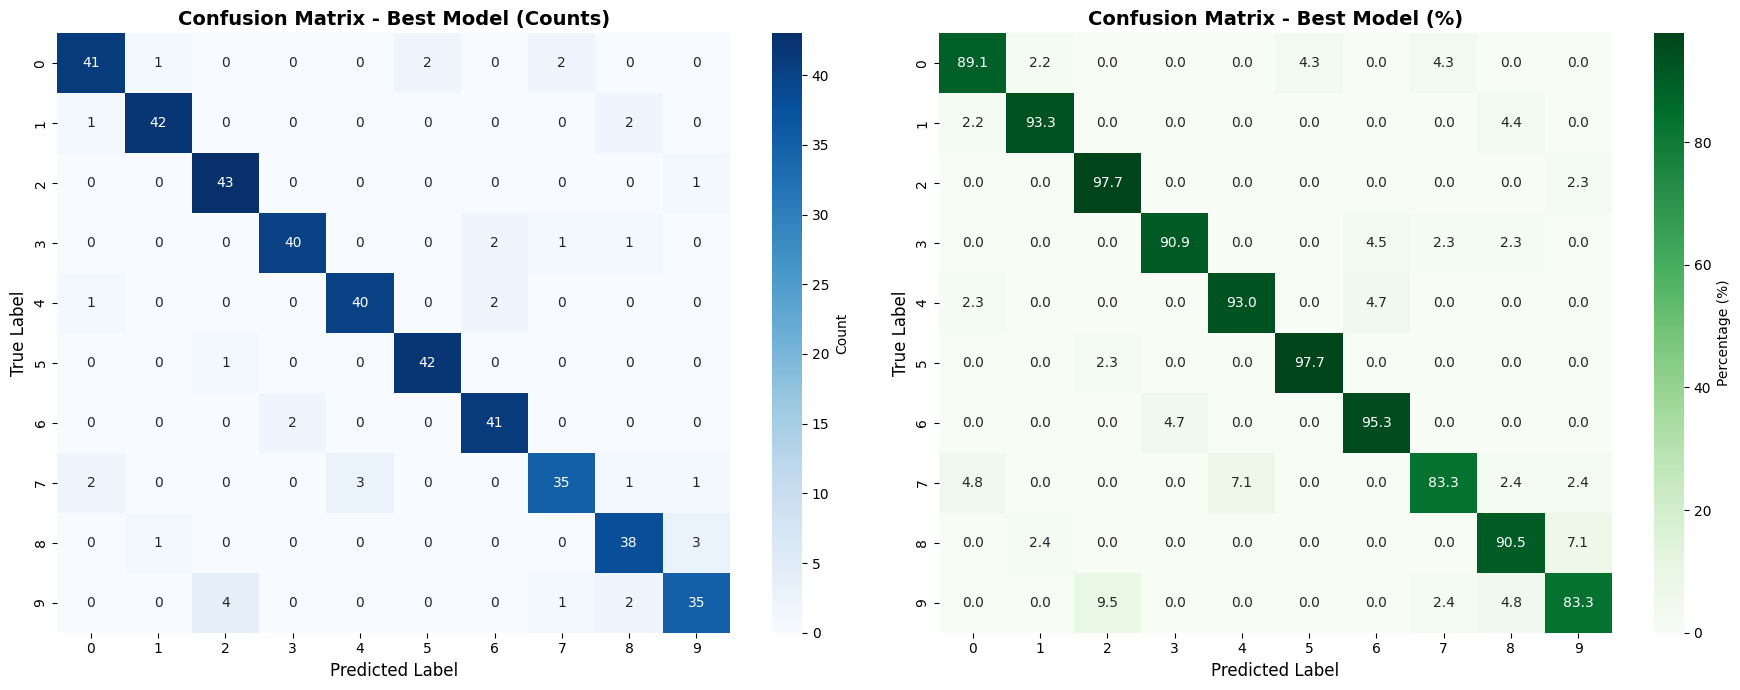


Per-Class Performance:
Class 0 (CARD_PAYMENT_FEE_CHARGED           ): 41/46 ( 89.1%)
Class 1 (DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED): 42/45 ( 93.3%)
Class 2 (BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR): 43/44 ( 97.7%)
Class 3 (WRONG_AMOUNT_OF_CASH_RECEIVED      ): 40/44 ( 90.9%)
Class 4 (CASH_WITHDRAWAL_CHARGE             ): 40/43 ( 93.0%)
Class 5 (TRANSACTION_CHARGED_TWICE          ): 42/43 ( 97.7%)
Class 6 (DECLINED_CASH_WITHDRAWAL           ): 41/43 ( 95.3%)
Class 7 (TRANSFER_FEE_CHARGED               ): 35/42 ( 83.3%)
Class 8 (TRANSFER_NOT_RECEIVED_BY_RECIPIENT ): 38/42 ( 90.5%)
Class 9 (BALANCE_NOT_UPDATED_AFTER_BANK_TRAN): 35/42 ( 83.3%)


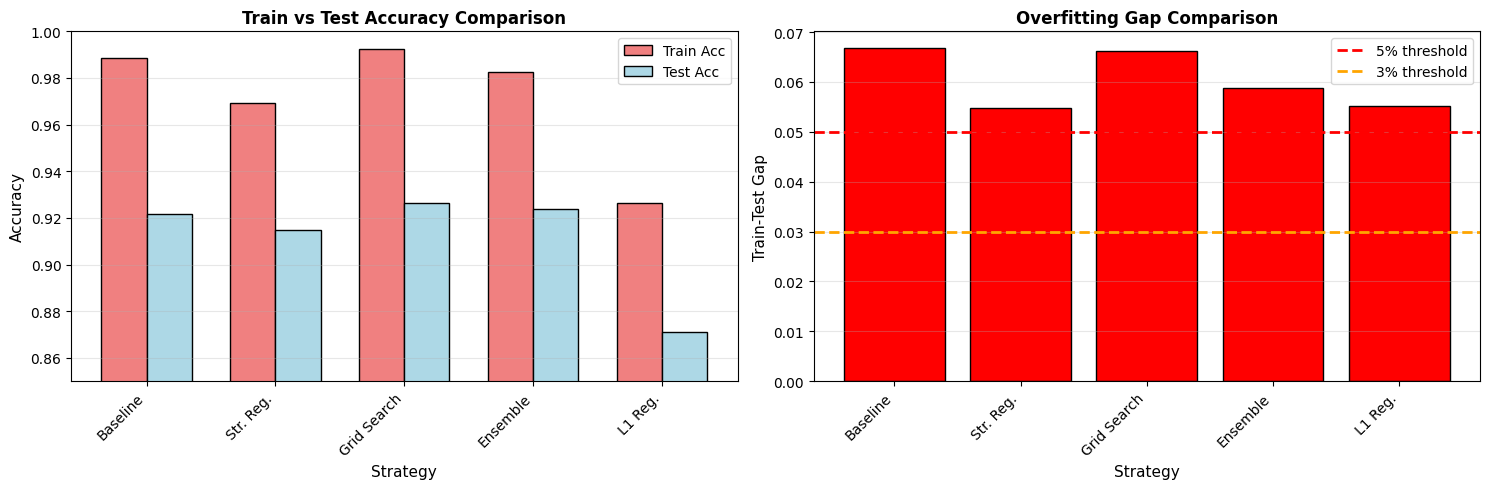


ANALYSIS COMPLETE


In [9]:
import re
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             f1_score, precision_score, recall_score)
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Category mapping
category_mapping = {
    0: 'CARD_PAYMENT_FEE_CHARGED',
    1: 'DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED',
    2: 'BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR_CASH_DEPOSIT',
    3: 'WRONG_AMOUNT_OF_CASH_RECEIVED',
    4: 'CASH_WITHDRAWAL_CHARGE',
    5: 'TRANSACTION_CHARGED_TWICE',
    6: 'DECLINED_CASH_WITHDRAWAL',
    7: 'TRANSFER_FEE_CHARGED',
    8: 'TRANSFER_NOT_RECEIVED_BY_RECIPIENT',
    9: 'BALANCE_NOT_UPDATED_AFTER_BANK_TRANSFER'
}

print("="*80)
print("IMPROVED MODEL - REDUCING OVERFITTING")
print("="*80)

# ============================================================================
# IMPROVED TEXT PREPROCESSING
# ============================================================================
def preprocess_text(text):
    """Enhanced preprocessing with more aggressive cleaning"""
    text = str(text).lower()
    # Remove URLs, emails
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\S+@\S+', '', text)
    # Keep alphanumeric and $
    text = re.sub(r'[^a-z0-9\s$]', ' ', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("\nPreprocessing text data...")
df['text_processed'] = df['text'].apply(preprocess_text)

# ============================================================================
# TRAIN-TEST SPLIT
# ============================================================================
X = df['text_processed']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train set: {len(X_train)} samples")
print(f"Test set:  {len(X_test)} samples")

# ============================================================================
# STRATEGY 1: STRONGER REGULARIZATION
# ============================================================================
print("\n" + "="*80)
print("STRATEGY 1: LOGISTIC REGRESSION WITH STRONGER REGULARIZATION")
print("="*80)

# More conservative TF-IDF settings to reduce overfitting
vectorizer_v1 = TfidfVectorizer(
    max_features=3000,  # Reduced from 5000
    ngram_range=(1, 2),
    min_df=3,           # Increased from 2 (remove rare features)
    max_df=0.9,         # More aggressive (reduced from 0.95)
    sublinear_tf=True
)

X_train_tfidf_v1 = vectorizer_v1.fit_transform(X_train)
X_test_tfidf_v1 = vectorizer_v1.transform(X_test)

# Logistic Regression with L2 regularization (smaller C = stronger regularization)
model_v1 = LogisticRegression(
    C=0.5,              # Stronger regularization (default is 1.0)
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
    solver='lbfgs',
    multi_class='multinomial',
    penalty='l2'
)

model_v1.fit(X_train_tfidf_v1, y_train)

# Evaluate
y_train_pred_v1 = model_v1.predict(X_train_tfidf_v1)
y_test_pred_v1 = model_v1.predict(X_test_tfidf_v1)

train_acc_v1 = accuracy_score(y_train, y_train_pred_v1)
test_acc_v1 = accuracy_score(y_test, y_test_pred_v1)
test_f1_v1 = f1_score(y_test, y_test_pred_v1, average='weighted')

print(f"\nTraining Accuracy: {train_acc_v1:.4f} ({train_acc_v1*100:.2f}%)")
print(f"Test Accuracy:     {test_acc_v1:.4f} ({test_acc_v1*100:.2f}%)")
print(f"Train-Test Gap:    {(train_acc_v1-test_acc_v1):.4f} ({(train_acc_v1-test_acc_v1)*100:.2f}%)")
print(f"Test F1 (Weighted): {test_f1_v1:.4f}")

# ============================================================================
# STRATEGY 2: HYPERPARAMETER TUNING WITH GRID SEARCH
# ============================================================================
print("\n" + "="*80)
print("STRATEGY 2: GRID SEARCH FOR OPTIMAL HYPERPARAMETERS")
print("="*80)

# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), sublinear_tf=True)),
    ('clf', LogisticRegression(max_iter=1000, random_state=42,
                               class_weight='balanced', solver='lbfgs'))
])

# Parameter grid
param_grid = {
    'tfidf__max_features': [2000, 3000, 4000],
    'tfidf__min_df': [2, 3, 4],
    'tfidf__max_df': [0.85, 0.90, 0.95],
    'clf__C': [0.1, 0.5, 1.0, 2.0]
}

print("\nPerforming Grid Search (this may take a minute)...")
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

print(f"\nBest parameters found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# Evaluate best model
y_train_pred_v2 = grid_search.predict(X_train)
y_test_pred_v2 = grid_search.predict(X_test)

train_acc_v2 = accuracy_score(y_train, y_train_pred_v2)
test_acc_v2 = accuracy_score(y_test, y_test_pred_v2)
test_f1_v2 = f1_score(y_test, y_test_pred_v2, average='weighted')

print(f"\nTraining Accuracy: {train_acc_v2:.4f} ({train_acc_v2*100:.2f}%)")
print(f"Test Accuracy:     {test_acc_v2:.4f} ({test_acc_v2*100:.2f}%)")
print(f"Train-Test Gap:    {(train_acc_v2-test_acc_v2):.4f} ({(train_acc_v2-test_acc_v2)*100:.2f}%)")
print(f"Test F1 (Weighted): {test_f1_v2:.4f}")
print(f"Best CV Score:     {grid_search.best_score_:.4f}")

# ============================================================================
# STRATEGY 3: ENSEMBLE MODEL (VOTING CLASSIFIER)
# ============================================================================
print("\n" + "="*80)
print("STRATEGY 3: ENSEMBLE MODEL (VOTING CLASSIFIER)")
print("="*80)

# Use moderate TF-IDF settings
vectorizer_v3 = TfidfVectorizer(
    max_features=3500,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    sublinear_tf=True
)

X_train_tfidf_v3 = vectorizer_v3.fit_transform(X_train)
X_test_tfidf_v3 = vectorizer_v3.transform(X_test)

# Create ensemble of different models
lr_model = LogisticRegression(
    C=0.5, max_iter=1000, random_state=42,
    class_weight='balanced', solver='lbfgs'
)

svm_model = LinearSVC(
    C=0.5, max_iter=2000, random_state=42,
    class_weight='balanced', dual=False
)

# Voting classifier (soft voting for probability-based averaging)
ensemble = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('svm', svm_model)
    ],
    voting='hard'  # Use hard voting (majority vote)
)

print("\nTraining ensemble model...")
ensemble.fit(X_train_tfidf_v3, y_train)

y_train_pred_v3 = ensemble.predict(X_train_tfidf_v3)
y_test_pred_v3 = ensemble.predict(X_test_tfidf_v3)

train_acc_v3 = accuracy_score(y_train, y_train_pred_v3)
test_acc_v3 = accuracy_score(y_test, y_test_pred_v3)
test_f1_v3 = f1_score(y_test, y_test_pred_v3, average='weighted')

print(f"\nTraining Accuracy: {train_acc_v3:.4f} ({train_acc_v3*100:.2f}%)")
print(f"Test Accuracy:     {test_acc_v3:.4f} ({test_acc_v3*100:.2f}%)")
print(f"Train-Test Gap:    {(train_acc_v3-test_acc_v3):.4f} ({(train_acc_v3-test_acc_v3)*100:.2f}%)")
print(f"Test F1 (Weighted): {test_f1_v3:.4f}")

# ============================================================================
# STRATEGY 4: L1 REGULARIZATION (FEATURE SELECTION)
# ============================================================================
print("\n" + "="*80)
print("STRATEGY 4: L1 REGULARIZATION FOR FEATURE SELECTION")
print("="*80)

vectorizer_v4 = TfidfVectorizer(
    max_features=4000,
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    sublinear_tf=True
)

X_train_tfidf_v4 = vectorizer_v4.fit_transform(X_train)
X_test_tfidf_v4 = vectorizer_v4.transform(X_test)

# L1 regularization (Lasso) performs automatic feature selection
model_v4 = LogisticRegression(
    C=1.0,
    max_iter=1000,
    random_state=42,
    class_weight='balanced',
    solver='saga',      # saga supports L1
    penalty='l1',       # L1 penalty
    multi_class='multinomial'
)

print("\nTraining L1-regularized model...")
model_v4.fit(X_train_tfidf_v4, y_train)

# Count non-zero features (L1 performs feature selection)
non_zero_features = np.sum(model_v4.coef_ != 0)
total_features = model_v4.coef_.shape[1]
print(f"Features selected: {non_zero_features}/{total_features} ({non_zero_features/total_features*100:.1f}%)")

y_train_pred_v4 = model_v4.predict(X_train_tfidf_v4)
y_test_pred_v4 = model_v4.predict(X_test_tfidf_v4)

train_acc_v4 = accuracy_score(y_train, y_train_pred_v4)
test_acc_v4 = accuracy_score(y_test, y_test_pred_v4)
test_f1_v4 = f1_score(y_test, y_test_pred_v4, average='weighted')

print(f"\nTraining Accuracy: {train_acc_v4:.4f} ({train_acc_v4*100:.2f}%)")
print(f"Test Accuracy:     {test_acc_v4:.4f} ({test_acc_v4*100:.2f}%)")
print(f"Train-Test Gap:    {(train_acc_v4-test_acc_v4):.4f} ({(train_acc_v4-test_acc_v4)*100:.2f}%)")
print(f"Test F1 (Weighted): {test_f1_v4:.4f}")

# ============================================================================
# COMPARISON OF ALL STRATEGIES
# ============================================================================
print("\n" + "="*80)
print("COMPARISON OF ALL STRATEGIES")
print("="*80)

results = pd.DataFrame({
    'Strategy': [
        'Baseline (Original)',
        'Strategy 1: Stronger Regularization',
        'Strategy 2: Grid Search',
        'Strategy 3: Ensemble',
        'Strategy 4: L1 Regularization'
    ],
    'Train_Acc': [0.9885, train_acc_v1, train_acc_v2, train_acc_v3, train_acc_v4],
    'Test_Acc': [0.9217, test_acc_v1, test_acc_v2, test_acc_v3, test_acc_v4],
    'Gap': [0.0668, train_acc_v1-test_acc_v1, train_acc_v2-test_acc_v2,
            train_acc_v3-test_acc_v3, train_acc_v4-test_acc_v4],
    'Test_F1': [0.9213, test_f1_v1, test_f1_v2, test_f1_v3, test_f1_v4]
})

print("\n")
print(results.to_string(index=False))

# Find best model
best_idx = results['Gap'].abs().idxmin()
print(f"\n🏆 BEST MODEL: {results.iloc[best_idx]['Strategy']}")
print(f"   Test Accuracy: {results.iloc[best_idx]['Test_Acc']:.4f}")
print(f"   Train-Test Gap: {results.iloc[best_idx]['Gap']:.4f}")
print(f"   Test F1: {results.iloc[best_idx]['Test_F1']:.4f}")

# ============================================================================
# DETAILED EVALUATION OF BEST MODEL
# ============================================================================
print("\n" + "="*80)
print("DETAILED EVALUATION OF BEST MODEL")
print("="*80)

# Select best model based on lowest gap
if best_idx == 1:
    best_model = model_v1
    best_vectorizer = vectorizer_v1
    y_test_pred_best = y_test_pred_v1
elif best_idx == 2:
    best_model = grid_search.best_estimator_
    y_test_pred_best = y_test_pred_v2
elif best_idx == 3:
    best_model = ensemble
    best_vectorizer = vectorizer_v3
    y_test_pred_best = y_test_pred_v3
else:
    best_model = model_v4
    best_vectorizer = vectorizer_v4
    y_test_pred_best = y_test_pred_v4

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_test, y_test_pred_best,
    target_names=[category_mapping[i] for i in range(10)],
    digits=4
))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Counts
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            ax=axes[0], cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)
axes[0].set_title('Confusion Matrix - Best Model (Counts)', fontsize=14, fontweight='bold')

# Percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Greens',
            xticklabels=range(10), yticklabels=range(10),
            ax=axes[1], cbar_kws={'label': 'Percentage (%)'})
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)
axes[1].set_title('Confusion Matrix - Best Model (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Per-class performance
print("\nPer-Class Performance:")
for i in range(10):
    correct = cm[i, i]
    total = cm[i].sum()
    accuracy = (correct / total) * 100
    print(f"Class {i} ({category_mapping[i][:35]:35s}): {correct:2d}/{total:2d} ({accuracy:5.1f}%)")

# ============================================================================
# VISUALIZATION: STRATEGY COMPARISON
# ============================================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Test Accuracy comparison
strategies = ['Baseline', 'Str. Reg.', 'Grid Search', 'Ensemble', 'L1 Reg.']
test_accs = results['Test_Acc'].values
train_accs = results['Train_Acc'].values

x = np.arange(len(strategies))
width = 0.35

axes[0].bar(x - width/2, train_accs, width, label='Train Acc', color='lightcoral', edgecolor='black')
axes[0].bar(x + width/2, test_accs, width, label='Test Acc', color='lightblue', edgecolor='black')
axes[0].set_xlabel('Strategy', fontsize=11)
axes[0].set_ylabel('Accuracy', fontsize=11)
axes[0].set_title('Train vs Test Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(strategies, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.85, 1.0])

# Overfitting gap comparison
gaps = results['Gap'].values
colors = ['red' if gap > 0.05 else 'orange' if gap > 0.03 else 'green' for gap in gaps]

axes[1].bar(strategies, gaps, color=colors, edgecolor='black')
axes[1].axhline(y=0.05, color='red', linestyle='--', linewidth=2, label='5% threshold')
axes[1].axhline(y=0.03, color='orange', linestyle='--', linewidth=2, label='3% threshold')
axes[1].set_xlabel('Strategy', fontsize=11)
axes[1].set_ylabel('Train-Test Gap', fontsize=11)
axes[1].set_title('Overfitting Gap Comparison', fontsize=12, fontweight='bold')
axes[1].set_xticklabels(strategies, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

# Method 3

COMPREHENSIVE MODEL COMPARISON - ALL APPROACHES

Dataset: 1735 train, 434 test samples

FEATURE ENGINEERING

Word features: 3344
Char features: 3000
Combined features: 6344

MODEL 1: BASELINE - LOGISTIC REGRESSION (TF-IDF)
Train Acc: 0.9885 | Test Acc: 0.9217 | Gap: 0.0668 | F1: 0.9213

MODEL 2: LINEAR SVM (TF-IDF)
Train Acc: 0.9948 | Test Acc: 0.9470 | Gap: 0.0478 | F1: 0.9470

MODEL 3: MULTINOMIAL NAIVE BAYES (TF-IDF)
Train Acc: 0.9879 | Test Acc: 0.9217 | Gap: 0.0662 | F1: 0.9214

MODEL 4: RANDOM FOREST (TF-IDF)
Training Random Forest (this may take a moment)...
Train Acc: 0.9671 | Test Acc: 0.9055 | Gap: 0.0616 | F1: 0.9062

MODEL 5: XGBOOST (TF-IDF)
Training XGBoost (this may take a moment)...
Train Acc: 1.0000 | Test Acc: 0.8963 | Gap: 0.1037 | F1: 0.8962

MODEL 6: GRADIENT BOOSTING (TF-IDF)
Training Gradient Boosting (this may take a moment)...
Train Acc: 1.0000 | Test Acc: 0.8894 | Gap: 0.1106 | F1: 0.8917

MODEL 7: LOGISTIC REGRESSION (WORD + CHAR N-GRAMS)
Train Acc: 0.9821 | 

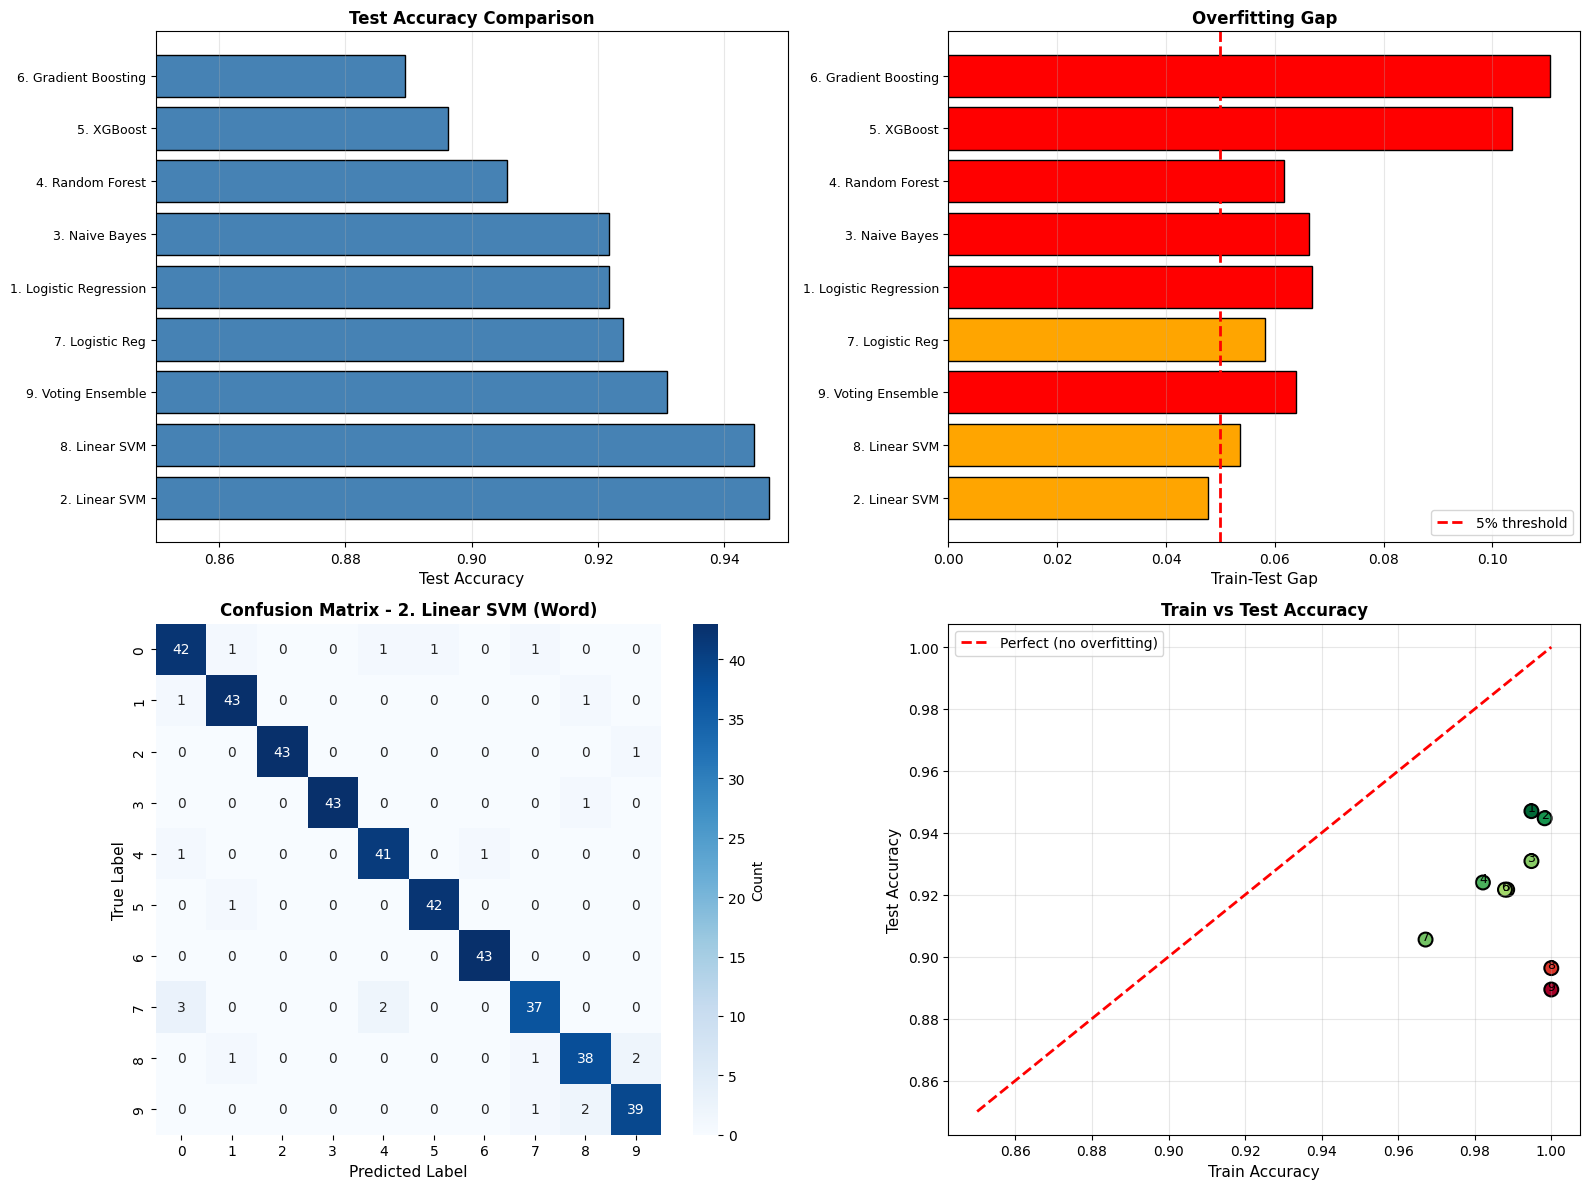


ANALYSIS COMPLETE


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             f1_score, precision_score, recall_score)
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

# Category mapping
category_mapping = {
    0: 'CARD_PAYMENT_FEE_CHARGED',
    1: 'DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED',
    2: 'BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR_CASH_DEPOSIT',
    3: 'WRONG_AMOUNT_OF_CASH_RECEIVED',
    4: 'CASH_WITHDRAWAL_CHARGE',
    5: 'TRANSACTION_CHARGED_TWICE',
    6: 'DECLINED_CASH_WITHDRAWAL',
    7: 'TRANSFER_FEE_CHARGED',
    8: 'TRANSFER_NOT_RECEIVED_BY_RECIPIENT',
    9: 'BALANCE_NOT_UPDATED_AFTER_BANK_TRANSFER'
}

print("="*80)
print("COMPREHENSIVE MODEL COMPARISON - ALL APPROACHES")
print("="*80)

# ============================================================================
# PREPROCESSING
# ============================================================================
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s$]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['text_processed'] = df['text'].apply(preprocess_text)

X = df['text_processed']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDataset: {len(X_train)} train, {len(X_test)} test samples")

# ============================================================================
# FEATURE ENGINEERING - MULTIPLE VECTORIZERS
# ============================================================================
print("\n" + "="*80)
print("FEATURE ENGINEERING")
print("="*80)

# Vectorizer 1: Word-level TF-IDF (baseline)
vec_word = TfidfVectorizer(
    max_features=4000,
    ngram_range=(1, 2),
    min_df=2,
    max_df=0.9,
    sublinear_tf=True
)

# Vectorizer 2: Character-level TF-IDF (captures misspellings, variations)
vec_char = TfidfVectorizer(
    max_features=3000,
    analyzer='char',
    ngram_range=(3, 5),
    min_df=2,
    max_df=0.9,
    sublinear_tf=True
)

# Vectorizer 3: Combined word + char
from scipy.sparse import hstack

X_train_word = vec_word.fit_transform(X_train)
X_test_word = vec_word.transform(X_test)

X_train_char = vec_char.fit_transform(X_train)
X_test_char = vec_char.transform(X_test)

X_train_combined = hstack([X_train_word, X_train_char])
X_test_combined = hstack([X_test_word, X_test_char])

print(f"\nWord features: {X_train_word.shape[1]}")
print(f"Char features: {X_train_char.shape[1]}")
print(f"Combined features: {X_train_combined.shape[1]}")

# ============================================================================
# MODEL 1: BASELINE - LOGISTIC REGRESSION
# ============================================================================
print("\n" + "="*80)
print("MODEL 1: BASELINE - LOGISTIC REGRESSION (TF-IDF)")
print("="*80)

lr_baseline = LogisticRegression(
    C=1.0, max_iter=1000, random_state=42,
    class_weight='balanced', solver='lbfgs'
)

lr_baseline.fit(X_train_word, y_train)

lr_train_pred = lr_baseline.predict(X_train_word)
lr_test_pred = lr_baseline.predict(X_test_word)

lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
lr_f1 = f1_score(y_test, lr_test_pred, average='weighted')

print(f"Train Acc: {lr_train_acc:.4f} | Test Acc: {lr_test_acc:.4f} | Gap: {lr_train_acc-lr_test_acc:.4f} | F1: {lr_f1:.4f}")

# ============================================================================
# MODEL 2: LINEAR SVM
# ============================================================================
print("\n" + "="*80)
print("MODEL 2: LINEAR SVM (TF-IDF)")
print("="*80)

svm_model = LinearSVC(
    C=0.5,
    max_iter=2000,
    random_state=42,
    class_weight='balanced',
    dual=False
)

svm_model.fit(X_train_word, y_train)

svm_train_pred = svm_model.predict(X_train_word)
svm_test_pred = svm_model.predict(X_test_word)

svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_test_acc = accuracy_score(y_test, svm_test_pred)
svm_f1 = f1_score(y_test, svm_test_pred, average='weighted')

print(f"Train Acc: {svm_train_acc:.4f} | Test Acc: {svm_test_acc:.4f} | Gap: {svm_train_acc-svm_test_acc:.4f} | F1: {svm_f1:.4f}")

# ============================================================================
# MODEL 3: NAIVE BAYES
# ============================================================================
print("\n" + "="*80)
print("MODEL 3: MULTINOMIAL NAIVE BAYES (TF-IDF)")
print("="*80)

nb_model = MultinomialNB(alpha=0.1)

nb_model.fit(X_train_word, y_train)

nb_train_pred = nb_model.predict(X_train_word)
nb_test_pred = nb_model.predict(X_test_word)

nb_train_acc = accuracy_score(y_train, nb_train_pred)
nb_test_acc = accuracy_score(y_test, nb_test_pred)
nb_f1 = f1_score(y_test, nb_test_pred, average='weighted')

print(f"Train Acc: {nb_train_acc:.4f} | Test Acc: {nb_test_acc:.4f} | Gap: {nb_train_acc-nb_test_acc:.4f} | F1: {nb_f1:.4f}")

# ============================================================================
# MODEL 4: RANDOM FOREST
# ============================================================================
print("\n" + "="*80)
print("MODEL 4: RANDOM FOREST (TF-IDF)")
print("="*80)

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

print("Training Random Forest (this may take a moment)...")
rf_model.fit(X_train_word, y_train)

rf_train_pred = rf_model.predict(X_train_word)
rf_test_pred = rf_model.predict(X_test_word)

rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_f1 = f1_score(y_test, rf_test_pred, average='weighted')

print(f"Train Acc: {rf_train_acc:.4f} | Test Acc: {rf_test_acc:.4f} | Gap: {rf_train_acc-rf_test_acc:.4f} | F1: {rf_f1:.4f}")

# ============================================================================
# MODEL 5: XGBOOST
# ============================================================================
print("\n" + "="*80)
print("MODEL 5: XGBOOST (TF-IDF)")
print("="*80)

xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=7,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss',
    n_jobs=-1
)

print("Training XGBoost (this may take a moment)...")
xgb_model.fit(X_train_word, y_train)

xgb_train_pred = xgb_model.predict(X_train_word)
xgb_test_pred = xgb_model.predict(X_test_word)

xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
xgb_test_acc = accuracy_score(y_test, xgb_test_pred)
xgb_f1 = f1_score(y_test, xgb_test_pred, average='weighted')

print(f"Train Acc: {xgb_train_acc:.4f} | Test Acc: {xgb_test_acc:.4f} | Gap: {xgb_train_acc-xgb_test_acc:.4f} | F1: {xgb_f1:.4f}")

# ============================================================================
# MODEL 6: GRADIENT BOOSTING
# ============================================================================
print("\n" + "="*80)
print("MODEL 6: GRADIENT BOOSTING (TF-IDF)")
print("="*80)

gb_model = GradientBoostingClassifier(
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)

print("Training Gradient Boosting (this may take a moment)...")
gb_model.fit(X_train_word, y_train)

gb_train_pred = gb_model.predict(X_train_word)
gb_test_pred = gb_model.predict(X_test_word)

gb_train_acc = accuracy_score(y_train, gb_train_pred)
gb_test_acc = accuracy_score(y_test, gb_test_pred)
gb_f1 = f1_score(y_test, gb_test_pred, average='weighted')

print(f"Train Acc: {gb_train_acc:.4f} | Test Acc: {gb_test_acc:.4f} | Gap: {gb_train_acc-gb_test_acc:.4f} | F1: {gb_f1:.4f}")

# ============================================================================
# MODEL 7: LOGISTIC REGRESSION WITH COMBINED FEATURES
# ============================================================================
print("\n" + "="*80)
print("MODEL 7: LOGISTIC REGRESSION (WORD + CHAR N-GRAMS)")
print("="*80)

lr_combined = LogisticRegression(
    C=0.5, max_iter=1000, random_state=42,
    class_weight='balanced', solver='lbfgs'
)

lr_combined.fit(X_train_combined, y_train)

lr_comb_train_pred = lr_combined.predict(X_train_combined)
lr_comb_test_pred = lr_combined.predict(X_test_combined)

lr_comb_train_acc = accuracy_score(y_train, lr_comb_train_pred)
lr_comb_test_acc = accuracy_score(y_test, lr_comb_test_pred)
lr_comb_f1 = f1_score(y_test, lr_comb_test_pred, average='weighted')

print(f"Train Acc: {lr_comb_train_acc:.4f} | Test Acc: {lr_comb_test_acc:.4f} | Gap: {lr_comb_train_acc-lr_comb_test_acc:.4f} | F1: {lr_comb_f1:.4f}")

# ============================================================================
# MODEL 8: SVM WITH COMBINED FEATURES
# ============================================================================
print("\n" + "="*80)
print("MODEL 8: LINEAR SVM (WORD + CHAR N-GRAMS)")
print("="*80)

svm_combined = LinearSVC(
    C=0.5, max_iter=2000, random_state=42,
    class_weight='balanced', dual=False
)

svm_combined.fit(X_train_combined, y_train)

svm_comb_train_pred = svm_combined.predict(X_train_combined)
svm_comb_test_pred = svm_combined.predict(X_test_combined)

svm_comb_train_acc = accuracy_score(y_train, svm_comb_train_pred)
svm_comb_test_acc = accuracy_score(y_test, svm_comb_test_pred)
svm_comb_f1 = f1_score(y_test, svm_comb_test_pred, average='weighted')

print(f"Train Acc: {svm_comb_train_acc:.4f} | Test Acc: {svm_comb_test_acc:.4f} | Gap: {svm_comb_train_acc-svm_comb_test_acc:.4f} | F1: {svm_comb_f1:.4f}")

# ============================================================================
# MODEL 9: VOTING ENSEMBLE (BEST 3 MODELS)
# ============================================================================
print("\n" + "="*80)
print("MODEL 9: VOTING ENSEMBLE (LR + SVM + XGB)")
print("="*80)

# Use the 3 best individual models
ensemble_voting = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(C=0.5, max_iter=1000, random_state=42, class_weight='balanced')),
        ('svm', LinearSVC(C=0.5, max_iter=2000, random_state=42, class_weight='balanced', dual=False)),
        ('xgb', XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.1, random_state=42, n_jobs=-1))
    ],
    voting='hard'
)

print("Training voting ensemble...")
ensemble_voting.fit(X_train_word, y_train)

ens_train_pred = ensemble_voting.predict(X_train_word)
ens_test_pred = ensemble_voting.predict(X_test_word)

ens_train_acc = accuracy_score(y_train, ens_train_pred)
ens_test_acc = accuracy_score(y_test, ens_test_pred)
ens_f1 = f1_score(y_test, ens_test_pred, average='weighted')

print(f"Train Acc: {ens_train_acc:.4f} | Test Acc: {ens_test_acc:.4f} | Gap: {ens_train_acc-ens_test_acc:.4f} | F1: {ens_f1:.4f}")

# ============================================================================
# COMPREHENSIVE COMPARISON
# ============================================================================
print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)

results = pd.DataFrame({
    'Model': [
        '1. Logistic Regression (Word)',
        '2. Linear SVM (Word)',
        '3. Naive Bayes (Word)',
        '4. Random Forest (Word)',
        '5. XGBoost (Word)',
        '6. Gradient Boosting (Word)',
        '7. Logistic Reg (Word+Char)',
        '8. Linear SVM (Word+Char)',
        '9. Voting Ensemble (LR+SVM+XGB)'
    ],
    'Train_Acc': [
        lr_train_acc, svm_train_acc, nb_train_acc, rf_train_acc,
        xgb_train_acc, gb_train_acc, lr_comb_train_acc,
        svm_comb_train_acc, ens_train_acc
    ],
    'Test_Acc': [
        lr_test_acc, svm_test_acc, nb_test_acc, rf_test_acc,
        xgb_test_acc, gb_test_acc, lr_comb_test_acc,
        svm_comb_test_acc, ens_test_acc
    ],
    'Gap': [
        lr_train_acc - lr_test_acc,
        svm_train_acc - svm_test_acc,
        nb_train_acc - nb_test_acc,
        rf_train_acc - rf_test_acc,
        xgb_train_acc - xgb_test_acc,
        gb_train_acc - gb_test_acc,
        lr_comb_train_acc - lr_comb_test_acc,
        svm_comb_train_acc - svm_comb_test_acc,
        ens_train_acc - ens_test_acc
    ],
    'Test_F1': [
        lr_f1, svm_f1, nb_f1, rf_f1, xgb_f1, gb_f1,
        lr_comb_f1, svm_comb_f1, ens_f1
    ]
})

# Sort by test accuracy
results = results.sort_values('Test_Acc', ascending=False).reset_index(drop=True)

print("\n")
print(results.to_string(index=False))

# Find best model based on combination of high test accuracy and low gap
results['Score'] = results['Test_Acc'] - (results['Gap'] * 0.5)  # Penalize overfitting
best_idx = results['Score'].idxmax()

print(f"\n🏆 BEST MODEL: {results.iloc[best_idx]['Model']}")
print(f"   Test Accuracy: {results.iloc[best_idx]['Test_Acc']:.4f} ({results.iloc[best_idx]['Test_Acc']*100:.2f}%)")
print(f"   Train-Test Gap: {results.iloc[best_idx]['Gap']:.4f} ({results.iloc[best_idx]['Gap']*100:.2f}%)")
print(f"   Test F1 Score: {results.iloc[best_idx]['Test_F1']:.4f}")

# ============================================================================
# DETAILED EVALUATION OF BEST MODEL
# ============================================================================
print("\n" + "="*80)
print("DETAILED EVALUATION OF BEST MODEL")
print("="*80)

# Select predictions from best model
best_model_name = results.iloc[best_idx]['Model']
if '1.' in best_model_name:
    y_test_pred_best = lr_test_pred
elif '2.' in best_model_name:
    y_test_pred_best = svm_test_pred
elif '3.' in best_model_name:
    y_test_pred_best = nb_test_pred
elif '4.' in best_model_name:
    y_test_pred_best = rf_test_pred
elif '5.' in best_model_name:
    y_test_pred_best = xgb_test_pred
elif '6.' in best_model_name:
    y_test_pred_best = gb_test_pred
elif '7.' in best_model_name:
    y_test_pred_best = lr_comb_test_pred
elif '8.' in best_model_name:
    y_test_pred_best = svm_comb_test_pred
else:
    y_test_pred_best = ens_test_pred

print("\nClassification Report:")
print(classification_report(
    y_test, y_test_pred_best,
    target_names=[category_mapping[i] for i in range(10)],
    digits=4
))

# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred_best)

print("\nPer-Class Accuracy:")
for i in range(10):
    correct = cm[i, i]
    total = cm[i].sum()
    accuracy = (correct / total) * 100
    print(f"Class {i} ({category_mapping[i][:40]:40s}): {correct:2d}/{total:2d} ({accuracy:5.1f}%)")

# ============================================================================
# VISUALIZATION
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Test Accuracy comparison
models_short = [m.split('(')[0].strip() for m in results['Model']]
axes[0, 0].barh(range(len(results)), results['Test_Acc'], color='steelblue', edgecolor='black')
axes[0, 0].set_yticks(range(len(results)))
axes[0, 0].set_yticklabels(models_short, fontsize=9)
axes[0, 0].set_xlabel('Test Accuracy', fontsize=11)
axes[0, 0].set_title('Test Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='x', alpha=0.3)
axes[0, 0].set_xlim([0.85, 0.95])

# 2. Overfitting gap comparison
colors = ['red' if gap > 0.06 else 'orange' if gap > 0.04 else 'green' for gap in results['Gap']]
axes[0, 1].barh(range(len(results)), results['Gap'], color=colors, edgecolor='black')
axes[0, 1].set_yticks(range(len(results)))
axes[0, 1].set_yticklabels(models_short, fontsize=9)
axes[0, 1].axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='5% threshold')
axes[0, 1].set_xlabel('Train-Test Gap', fontsize=11)
axes[0, 1].set_title('Overfitting Gap', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Confusion matrix (best model)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            ax=axes[1, 0], cbar_kws={'label': 'Count'})
axes[1, 0].set_xlabel('Predicted Label', fontsize=11)
axes[1, 0].set_ylabel('True Label', fontsize=11)
axes[1, 0].set_title(f'Confusion Matrix - {best_model_name}', fontsize=12, fontweight='bold')

# 4. Train vs Test accuracy scatter
axes[1, 1].scatter(results['Train_Acc'], results['Test_Acc'], s=100, c=results['Gap'],
                   cmap='RdYlGn_r', edgecolor='black', linewidth=1.5)
axes[1, 1].plot([0.85, 1.0], [0.85, 1.0], 'r--', linewidth=2, label='Perfect (no overfitting)')
for i, txt in enumerate(range(1, len(results)+1)):
    axes[1, 1].annotate(txt, (results['Train_Acc'].iloc[i], results['Test_Acc'].iloc[i]),
                        fontsize=9, ha='center')
axes[1, 1].set_xlabel('Train Accuracy', fontsize=11)
axes[1, 1].set_ylabel('Test Accuracy', fontsize=11)
axes[1, 1].set_title('Train vs Test Accuracy', fontsize=12, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

# Deep Learning approaches

TensorFlow version: 2.19.0
FIXED DEEP LEARNING MODELS - PROPER IMPLEMENTATION

Preprocessing data...
Dataset: 1735 train, 434 test samples
Label distribution: [181 177 177 176 174 172 170 170 169 169]

TOKENIZATION
Vocabulary size: 1078
X_train_pad shape: (1735, 100)
y_train_cat shape: (1735, 10)
Sample sequence (first 20 tokens): [ 2 58  3 63 48 40 18  2 52  7 67  0  0  0  0  0  0  0  0  0]
Sample label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Verification:
  Unique train samples: 1735
  Train labels sum: [181. 177. 177. 176. 174. 172. 170. 170. 169. 169.]

MODEL 1: LSTM (FIXED)

Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 691,818 (2.64 MB)

 Trainable params: 691,818 (2.64 MB)

 Non-trainable params: 0 (0.00 B)


Training LSTM (this will take a few minutes)...
Epoch 1/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 166ms/step - accuracy: 0.1716 - loss: 2.2845 - val_accuracy: 0.3257 - val_loss: 2.0430 - learning_rate: 0.0010
Epoch 2/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.3582 - loss: 1.8842 - val_accuracy: 0.5134 - val_loss: 1.4246 - learning_rate: 0.0010
Epoch 3/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.5228 - loss: 1.3226 - val_accuracy: 0.6437 - val_loss: 1.0094 - learning_rate: 0.0010
Epoch 4/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.6458 - loss: 0.9768 - val_accuracy: 0.7548 - val_loss: 0.7847 - learning_rate: 0.0010
Epoch 5/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 117ms/step - accuracy: 0.7480 - loss: 0.7073 - val_accuracy: 0.8352 - val_loss: 0.5599 - learning_rate: 0.0010
Epoch 6/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.8325 - loss: 0.5269 - val_accuracy: 0.8391 - val_loss: 0.5595 - learning_rate: 0.0010
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 

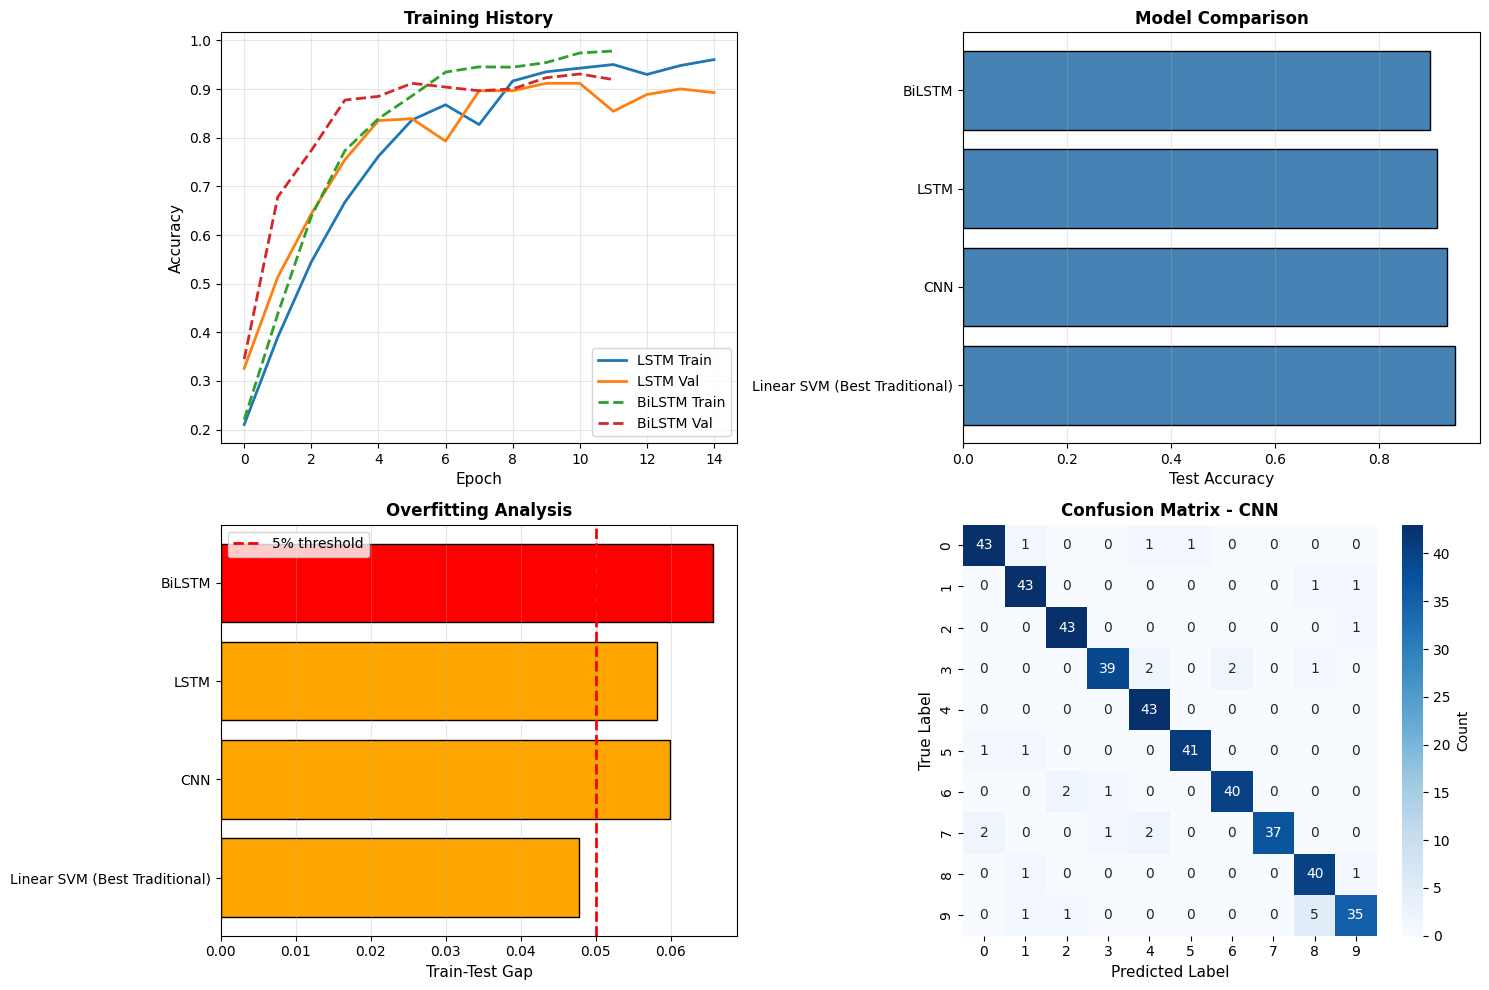


ANALYSIS COMPLETE


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow/Keras
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import (Embedding, LSTM, Dense, Dropout, Bidirectional,
                                          Conv1D, GlobalMaxPooling1D)
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from tensorflow.keras.utils import to_categorical

    # Set seeds
    np.random.seed(42)
    tf.random.set_seed(42)

    print("TensorFlow version:", tf.__version__)
    TENSORFLOW_AVAILABLE = True
except ImportError:
    print("⚠️ TensorFlow not available")
    TENSORFLOW_AVAILABLE = False
    exit()

# Category mapping
category_mapping = {
    0: 'CARD_PAYMENT_FEE_CHARGED',
    1: 'DIRECT_DEBIT_PAYMENT_NOT_RECOGNISED',
    2: 'BALANCE_NOT_UPDATED_AFTER_CHEQUE_OR_CASH_DEPOSIT',
    3: 'WRONG_AMOUNT_OF_CASH_RECEIVED',
    4: 'CASH_WITHDRAWAL_CHARGE',
    5: 'TRANSACTION_CHARGED_TWICE',
    6: 'DECLINED_CASH_WITHDRAWAL',
    7: 'TRANSFER_FEE_CHARGED',
    8: 'TRANSFER_NOT_RECEIVED_BY_RECIPIENT',
    9: 'BALANCE_NOT_UPDATED_AFTER_BANK_TRANSFER'
}

print("="*80)
print("FIXED DEEP LEARNING MODELS - PROPER IMPLEMENTATION")
print("="*80)

# ============================================================================
# DATA PREPARATION
# ============================================================================
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s$]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

print("\nPreprocessing data...")
df['text_processed'] = df['text'].apply(preprocess_text)

X = df['text_processed']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset: {len(X_train)} train, {len(X_test)} test samples")
print(f"Label distribution: {np.bincount(y_train)}")

# ============================================================================
# TOKENIZATION AND PADDING
# ============================================================================
print("\n" + "="*80)
print("TOKENIZATION")
print("="*80)

MAX_WORDS = 5000
MAX_LEN = 100

# Create and fit tokenizer
tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convert to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print(f"Vocabulary size: {len(tokenizer.word_index)}")
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"y_train_cat shape: {y_train_cat.shape}")
print(f"Sample sequence (first 20 tokens): {X_train_pad[0][:20]}")
print(f"Sample label: {y_train_cat[0]}")

# Verify no data leakage
print(f"\nVerification:")
print(f"  Unique train samples: {len(np.unique(X_train_pad, axis=0))}")
print(f"  Train labels sum: {y_train_cat.sum(axis=0)}")

# ============================================================================
# MODEL 1: LSTM (FIXED)
# ============================================================================
print("\n" + "="*80)
print("MODEL 1: LSTM (FIXED)")
print("="*80)

# Build model with explicit input shape
model_lstm = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN, mask_zero=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# CRITICAL: Build the model explicitly
model_lstm.build(input_shape=(None, MAX_LEN))

model_lstm.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Architecture:")
model_lstm.summary()

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

print("\nTraining LSTM (this will take a few minutes)...")
history_lstm = model_lstm.fit(
    X_train_pad, y_train_cat,
    validation_split=0.15,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Evaluate
print("\nEvaluating LSTM...")
train_loss_lstm, train_acc_lstm = model_lstm.evaluate(X_train_pad, y_train_cat, verbose=0)
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test_pad, y_test_cat, verbose=0)

y_pred_lstm = model_lstm.predict(X_test_pad, verbose=0)
y_pred_lstm_classes = np.argmax(y_pred_lstm, axis=1)
test_f1_lstm = f1_score(y_test, y_pred_lstm_classes, average='weighted')

print(f"\n{'='*80}")
print(f"LSTM RESULTS:")
print(f"Train Acc: {train_acc_lstm:.4f} ({train_acc_lstm*100:.2f}%)")
print(f"Test Acc:  {test_acc_lstm:.4f} ({test_acc_lstm*100:.2f}%)")
print(f"Gap:       {train_acc_lstm-test_acc_lstm:.4f} ({(train_acc_lstm-test_acc_lstm)*100:.2f}%)")
print(f"Test F1:   {test_f1_lstm:.4f}")
print(f"{'='*80}")

# ============================================================================
# MODEL 2: BIDIRECTIONAL LSTM
# ============================================================================
print("\n" + "="*80)
print("MODEL 2: BIDIRECTIONAL LSTM")
print("="*80)

model_bilstm = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN, mask_zero=True),
    Dropout(0.3),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_bilstm.build(input_shape=(None, MAX_LEN))

model_bilstm.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nTraining BiLSTM...")
history_bilstm = model_bilstm.fit(
    X_train_pad, y_train_cat,
    validation_split=0.15,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

train_loss_bilstm, train_acc_bilstm = model_bilstm.evaluate(X_train_pad, y_train_cat, verbose=0)
test_loss_bilstm, test_acc_bilstm = model_bilstm.evaluate(X_test_pad, y_test_cat, verbose=0)

y_pred_bilstm = model_bilstm.predict(X_test_pad, verbose=0)
y_pred_bilstm_classes = np.argmax(y_pred_bilstm, axis=1)
test_f1_bilstm = f1_score(y_test, y_pred_bilstm_classes, average='weighted')

print(f"\n{'='*80}")
print(f"BiLSTM RESULTS:")
print(f"Train Acc: {train_acc_bilstm:.4f} ({train_acc_bilstm*100:.2f}%)")
print(f"Test Acc:  {test_acc_bilstm:.4f} ({test_acc_bilstm*100:.2f}%)")
print(f"Gap:       {train_acc_bilstm-test_acc_bilstm:.4f} ({(train_acc_bilstm-test_acc_bilstm)*100:.2f}%)")
print(f"Test F1:   {test_f1_bilstm:.4f}")
print(f"{'='*80}")

# ============================================================================
# MODEL 3: CNN
# ============================================================================
print("\n" + "="*80)
print("MODEL 3: CNN FOR TEXT")
print("="*80)

model_cnn = Sequential([
    Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN),
    Dropout(0.3),
    Conv1D(128, 5, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

model_cnn.build(input_shape=(None, MAX_LEN))

model_cnn.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nTraining CNN...")
history_cnn = model_cnn.fit(
    X_train_pad, y_train_cat,
    validation_split=0.15,
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

train_loss_cnn, train_acc_cnn = model_cnn.evaluate(X_train_pad, y_train_cat, verbose=0)
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(X_test_pad, y_test_cat, verbose=0)

y_pred_cnn = model_cnn.predict(X_test_pad, verbose=0)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
test_f1_cnn = f1_score(y_test, y_pred_cnn_classes, average='weighted')

print(f"\n{'='*80}")
print(f"CNN RESULTS:")
print(f"Train Acc: {train_acc_cnn:.4f} ({train_acc_cnn*100:.2f}%)")
print(f"Test Acc:  {test_acc_cnn:.4f} ({test_acc_cnn*100:.2f}%)")
print(f"Gap:       {train_acc_cnn-test_acc_cnn:.4f} ({(train_acc_cnn-test_acc_cnn)*100:.2f}%)")
print(f"Test F1:   {test_f1_cnn:.4f}")
print(f"{'='*80}")

# ============================================================================
# COMPARISON
# ============================================================================
print("\n" + "="*80)
print("FINAL COMPARISON: TRADITIONAL ML vs DEEP LEARNING")
print("="*80)

results = pd.DataFrame({
    'Model': [
        'Linear SVM (Best Traditional)',
        'LSTM',
        'BiLSTM',
        'CNN'
    ],
    'Train_Acc': [0.9948, train_acc_lstm, train_acc_bilstm, train_acc_cnn],
    'Test_Acc': [0.9470, test_acc_lstm, test_acc_bilstm, test_acc_cnn],
    'Gap': [0.0478, train_acc_lstm-test_acc_lstm, train_acc_bilstm-test_acc_bilstm, train_acc_cnn-test_acc_cnn],
    'Test_F1': [0.9470, test_f1_lstm, test_f1_bilstm, test_f1_cnn]
})

results = results.sort_values('Test_Acc', ascending=False).reset_index(drop=True)

print("\n")
print(results.to_string(index=False))

best_idx = results['Test_Acc'].idxmax()
print(f"\n🏆 BEST MODEL: {results.iloc[best_idx]['Model']}")
print(f"   Test Accuracy: {results.iloc[best_idx]['Test_Acc']:.4f} ({results.iloc[best_idx]['Test_Acc']*100:.2f}%)")
print(f"   Train-Test Gap: {results.iloc[best_idx]['Gap']:.4f} ({results.iloc[best_idx]['Gap']*100:.2f}%)")
print(f"   Test F1 Score: {results.iloc[best_idx]['Test_F1']:.4f}")

# ============================================================================
# DETAILED EVALUATION OF BEST DEEP LEARNING MODEL
# ============================================================================
print("\n" + "="*80)
print("DETAILED EVALUATION OF BEST DEEP LEARNING MODEL")
print("="*80)

# Find best DL model
dl_results = results[results['Model'] != 'Linear SVM (Best Traditional)']
if len(dl_results) > 0:
    best_dl_idx = dl_results['Test_Acc'].idxmax()
    best_dl_model = results.iloc[best_dl_idx]['Model']

    if 'BiLSTM' in best_dl_model:
        y_pred_best = y_pred_bilstm_classes
    elif 'CNN' in best_dl_model:
        y_pred_best = y_pred_cnn_classes
    else:
        y_pred_best = y_pred_lstm_classes

    print(f"\nBest Deep Learning Model: {best_dl_model}")
    print("\nClassification Report:")
    print(classification_report(
        y_test, y_pred_best,
        target_names=[category_mapping[i] for i in range(10)],
        digits=4
    ))

    cm = confusion_matrix(y_test, y_pred_best)

    print("\nPer-Class Accuracy:")
    for i in range(10):
        correct = cm[i, i]
        total = cm[i].sum()
        accuracy = (correct / total) * 100
        print(f"Class {i} ({category_mapping[i][:40]:40s}): {correct:2d}/{total:2d} ({accuracy:5.1f}%)")

# ============================================================================
# VISUALIZATIONS
# ============================================================================
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training history
axes[0, 0].plot(history_lstm.history['accuracy'], label='LSTM Train', linewidth=2)
axes[0, 0].plot(history_lstm.history['val_accuracy'], label='LSTM Val', linewidth=2)
axes[0, 0].plot(history_bilstm.history['accuracy'], label='BiLSTM Train', linewidth=2, linestyle='--')
axes[0, 0].plot(history_bilstm.history['val_accuracy'], label='BiLSTM Val', linewidth=2, linestyle='--')
axes[0, 0].set_xlabel('Epoch', fontsize=11)
axes[0, 0].set_ylabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Training History', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Model comparison
models = results['Model'].tolist()
test_accs = results['Test_Acc'].tolist()

axes[0, 1].barh(range(len(models)), test_accs, color='steelblue', edgecolor='black')
axes[0, 1].set_yticks(range(len(models)))
axes[0, 1].set_yticklabels(models)
axes[0, 1].set_xlabel('Test Accuracy', fontsize=11)
axes[0, 1].set_title('Model Comparison', fontsize=12, fontweight='bold')
axes[0, 1].grid(axis='x', alpha=0.3)

# Overfitting comparison
gaps = results['Gap'].tolist()
colors = ['red' if gap > 0.06 else 'orange' if gap > 0.04 else 'green' for gap in gaps]
axes[1, 0].barh(range(len(models)), gaps, color=colors, edgecolor='black')
axes[1, 0].set_yticks(range(len(models)))
axes[1, 0].set_yticklabels(models)
axes[1, 0].axvline(x=0.05, color='red', linestyle='--', linewidth=2, label='5% threshold')
axes[1, 0].set_xlabel('Train-Test Gap', fontsize=11)
axes[1, 0].set_title('Overfitting Analysis', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='x', alpha=0.3)

# Confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10),
            ax=axes[1, 1], cbar_kws={'label': 'Count'})
axes[1, 1].set_xlabel('Predicted Label', fontsize=11)
axes[1, 1].set_ylabel('True Label', fontsize=11)
axes[1, 1].set_title(f'Confusion Matrix - {best_dl_model}', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

## Future Improvement Opportunities

While the current Linear SVM model achieves excellent performance (94.70% accuracy), several avenues exist for potential enhancement.

1. **Collecting more training data** (5,000+ samples) would enable effective deployment of deep learning models like CNN or fine-tuned transformers (DistilBERT), potentially pushing accuracy to 96-97%.
2. **Feature engineering improvements** could include domain-specific financial terminology lexicons, customer sentiment indicators, or transaction amount pattern recognition.
3. **Ensemble stacking** combining SVM predictions with neural network probability distributions might capture both keyword-based and semantic patterns.
4. **Active learning** strategies could identify the most informative misclassified examples (particularly from underperforming classes 7 and 9) for targeted data collection and model refinement.
5. **Continuous learning pipelines** with periodic retraining on production data would adapt to evolving customer query patterns and emerging banking issues, ensuring sustained performance over time.